# Import  dataset

We'll use the `tdm_client` library to automatically retrieve the [metadata](https://docs.tdm-pilot.org/key-terms/#metadata) for a [dataset](https://docs.tdm-pilot.org/key-terms/#dataset). We can retrieve [metadata](https://docs.tdm-pilot.org/key-terms/#metadata) in a [CSV file](https://docs.tdm-pilot.org/key-terms/#csv-file) using the `get_metadata` method.

Enter a [dataset ID](https://docs.tdm-pilot.org/key-terms/#dataset-ID) in the next code cell. 


In [2]:
# Creating a variable `dataset_id` to hold our dataset ID
# The default dataset is Shakespeare Quarterly, 1950-present
dataset_id = "2b547801-f0ba-ff65-d688-02013f92def2"

Next, import the `tdm_client`, passing the `dataset_id` as an argument using the `get_metadata` method.

In [3]:
# Import the `tdm_client`
import tdm_client

# Pull in our dataset CSV using 
dataset_metadata = tdm_client.get_metadata(dataset_id)

INFO:root:Downloading 2b547801-f0ba-ff65-d688-02013f92def2 metadata to /home/jovyan/data/2b547801-f0ba-ff65-d688-02013f92def2.csv


100% |########################################################################|


We are ready to import pandas for our analysis and create a dataframe. We will use the `read_csv()` method to create our dataframe from the CSV file.

In [4]:
# Import pandas 
import pandas as pd

# Create our dataframe
df = pd.read_csv(dataset_metadata)

We can confirm the size of our dataset using the `len()` function on our dataframe.

In [5]:
original_document_count = len(df)
print('Total original documents:', original_document_count)

Total original documents: 3858


Now let's take a look at the data in our dataframe `df`. We will set pandas to show all columns using `set_option()` then get a preview using `head()`.

In [7]:
# Set the pandas option to show all columns
pd.set_option("max_columns", None) 

# Show the first five rows of our dataframe
df.head(2) 

,id,title,isPartOf,publicationYear,doi,docType,provider,datePublished,issueNumber,volumeNumber,url,creator,publisher,language,pageStart,pageEnd,placeOfPublication,wordCount,pageCount,outputFormat
0,http://www.jstor.org/stable/25541875,Review Article,Libraries & Culture,2004,NaN,article,jstor,2004-10-01,4,39,http://www.jstor.org/stable/25541875,Barbara M. Benedict,University of Texas Press,eng,475,477,NaN,1332,3,unigram; bigram; trigram
1,http://www.jstor.org/stable/25541670,Communications,The Journal of Library History (1974-1987),1985,NaN,article,jstor,1985-10-01,4,20,http://www.jstor.org/stable/25541670,Stanley M. Max,University of Texas Press,eng,463,463,NaN,371,1,unigram; bigram; trigram


---
## Metadata Type by Column Name

Here are descriptions for the metadata types found in each column:

|Column Name|Description|
|---|---|
|id|a unique item ID (In JSTOR, this is a stable URL)|
|title|the title for the item|
|isPartOf|the larger work that holds this title (for example, a journal title)|
|publicationYear|the year of publication|
|doi|the digital object identifier for an item|
|docType|the type of document (for example, article or book)|
|provider|the source or provider of the dataset|
|datePublished|the publication date in yyyy-mm-dd format|
|issueNumber|the issue number for a journal publication|
|volumeNumber|the volume number for a journal publication|
|url|a URL for the item and/or the item's metadata|
|creator|the author or authors of the item|
|publisher|the publisher for the item|
|language|the language or languages of the item (eng is the ISO 639 code for English)|
|pageStart|the first page number of the print version|
|pageEnd|the last page number of the print version|
|placeOfPublication|the city of the publisher|
|wordCount|the number of words in the item|
|pageCount|the number of print pages in the item|
|outputFormat|what data is available ([unigrams](https://docs.tdm-pilot.org/key-terms/#unigram), [bigrams](https://docs.tdm-pilot.org/key-terms/#bigram), [trigrams](https://docs.tdm-pilot.org/key-terms/#trigram), and/or full-text)|

If there are any columns you would like to drop from your analysis, you can drop them with:

`df df.drop(['column_name1', 'column_name2', ...], axis=1)`

In [8]:
# Drop each of these named columns
df = df.drop(['outputFormat', 'pageEnd', 'pageStart', 'datePublished', 'language'], axis=1)

# Show the first five rows of our updated dataframe
df.head()

,id,title,isPartOf,publicationYear,doi,docType,provider,issueNumber,volumeNumber,url,creator,publisher,placeOfPublication,wordCount,pageCount
0,http://www.jstor.org/stable/25541875,Review Article,Libraries & Culture,2004,NaN,article,jstor,4,39,http://www.jstor.org/stable/25541875,Barbara M. Benedict,University of Texas Press,NaN,1332,3
1,http://www.jstor.org/stable/25541670,Communications,The Journal of Library History (1974-1987),1985,NaN,article,jstor,4,20,http://www.jstor.org/stable/25541670,Stanley M. Max,University of Texas Press,NaN,371,1
2,http://www.jstor.org/stable/25750370,Review Article,Libraries & the Cultural Record,2010,NaN,article,jstor,4,45,http://www.jstor.org/stable/25750370,Jeremy B. Dibbell,University of Texas Press,NaN,1119,3
3,http://www.jstor.org/stable/25549031,Review Article,Libraries & Culture,2002,NaN,article,jstor,3,37,http://www.jstor.org/stable/25549031,Hermina G. B. Anghelescu,University of Texas Press,NaN,1534,4
4,http://www.jstor.org/stable/25542375,The Cover,Libraries & Culture,1991,NaN,article,jstor,4,26,http://www.jstor.org/stable/25542375,"John Richardson, Jr.",University of Texas Press,NaN,798,3


If you would like to know if a particular id is in the dataframe, you can use the `in` operator to return a boolean value (True or False). 

In [10]:
# Check if a particular item id is in the `id` column
'http://www.jstor.org/stable/25541875' in df.id.values

True

## Filtering Out Unwanted Texts

Now that we have filtered out unwanted metadata columns, we can begin filtering out any texts that may not match our research interests. Let's examine the first and last twenty rows of the dataframe to see if we can identify texts that we would like to remove. We are looking for patterns in the metadata that could help us remove many texts at once.

In [6]:
# Preview the first twenty items in the dataframe
df.head(20) # Change 20 to view a greater or lesser number of rows

,id,title,isPartOf,publicationYear,doi,docType,provider,datePublished,issueNumber,volumeNumber,url,creator,publisher,language,pageStart,pageEnd,placeOfPublication,wordCount,pageCount,outputFormat
0,http://www.jstor.org/stable/25541875,Review Article,Libraries & Culture,2004,NaN,article,jstor,2004-10-01,4,39,http://www.jstor.org/stable/25541875,Barbara M. Benedict,University of Texas Press,eng,475,477,NaN,1332,3,unigram; bigram; trigram
1,http://www.jstor.org/stable/25541670,Communications,The Journal of Library History (1974-1987),1985,NaN,article,jstor,1985-10-01,4,20,http://www.jstor.org/stable/25541670,Stanley M. Max,University of Texas Press,eng,463,463,NaN,371,1,unigram; bigram; trigram
2,http://www.jstor.org/stable/25750370,Review Article,Libraries & the Cultural Record,2010,NaN,article,jstor,2010-01-01,4,45,http://www.jstor.org/stable/25750370,Jeremy B. Dibbell,University of Texas Press,eng,499,501,NaN,1119,3,unigram; bigram; trigram
3,http://www.jstor.org/stable/25549031,Review Article,Libraries & Culture,2002,NaN,article,jstor,2002-07-01,3,37,http://www.jstor.org/stable/25549031,Hermina G. B. Anghelescu,University of Texas Press,eng,296,299,NaN,1534,4,unigram; bigram; trigram
4,http://www.jstor.org/stable/25542375,The Cover,Libraries & Culture,1991,NaN,article,jstor,1991-10-01,4,26,http://www.jstor.org/stable/25542375,"John Richardson, Jr.",University of Texas Press,eng,608,610,NaN,798,3,unigram; bigram; trigram
5,http://www.jstor.org/stable/25541675,Honoring Haynes McMullen,The Journal of Library History (1974-1987),1986,NaN,article,jstor,1986-01-01,1,21,http://www.jstor.org/stable/25541675,Edward G. Holley,University of Texas Press,eng,3,7,NaN,1707,5,unigram; bigram; trigram
6,http://www.jstor.org/stable/25541596,The History of Library and Information Science...,The Journal of Library History (1974-1987),1985,NaN,article,jstor,1985-04-01,2,20,http://www.jstor.org/stable/25541596,Robert M. Hayes,University of Texas Press,eng,173,178,NaN,2548,6,unigram; bigram; trigram
7,http://www.jstor.org/stable/25542779,Review Article,Libraries & Culture,1995,NaN,article,jstor,1995-07-01,3,30,http://www.jstor.org/stable/25542779,Patricia S. Kruppa,University of Texas Press,eng,321,322,NaN,667,2,unigram; bigram; trigram
8,http://www.jstor.org/stable/25541478,Review Article,The Journal of Library History (1974-1987),1983,NaN,article,jstor,1983-10-01,4,18,http://www.jstor.org/stable/25541478,S. D. Neill,University of Texas Press,eng,521,523,NaN,879,3,unigram; bigram; trigram
9,http://www.jstor.org/stable/25542533,The American Heritage Project: Librarians and ...,Libraries & Culture,1993,NaN,article,jstor,1993-04-01,2,28,http://www.jstor.org/stable/25542533,Jean Preer,University of Texas Press,eng,165,188,NaN,10718,24,unigram; bigram; trigram


In [7]:
# Preview the last twenty items in the dataframe
df.tail(20) # Change 20 to view a greater or lesser number of rows

,id,title,isPartOf,publicationYear,doi,docType,provider,datePublished,issueNumber,volumeNumber,url,creator,publisher,language,pageStart,pageEnd,placeOfPublication,wordCount,pageCount,outputFormat
3838,http://www.jstor.org/stable/25540573,The Library of Congress in the Nineteenth Cent...,The Journal of Library History (1974-1987),1974,NaN,article,jstor,1974-07-01,3,9,http://www.jstor.org/stable/25540573,John Y. Cole,University of Texas Press,eng,222,240,NaN,7356,21,unigram; bigram; trigram
3839,http://www.jstor.org/stable/25542371,Front Matter,Libraries & Culture,1991,NaN,article,jstor,1991-10-01,4,26,http://www.jstor.org/stable/25542371,NaN,University of Texas Press,eng,NaN,NaN,NaN,1362,6,unigram; bigram; trigram
3840,http://www.jstor.org/stable/25542542,Review Article,Libraries & Culture,1993,NaN,article,jstor,1993-04-01,2,28,http://www.jstor.org/stable/25542542,Jonathan Dewald,University of Texas Press,eng,224,225,NaN,755,2,unigram; bigram; trigram
3841,http://www.jstor.org/stable/25549395,Review Article,Libraries & the Cultural Record,2007,NaN,article,jstor,2007-01-01,1,42,http://www.jstor.org/stable/25549395,Marcia Karp,University of Texas Press,eng,105,107,NaN,1037,3,unigram; bigram; trigram
3842,http://www.jstor.org/stable/25540692,Review Article,The Journal of Library History (1974-1987),1976,NaN,article,jstor,1976-07-01,3,11,http://www.jstor.org/stable/25540692,Bonnie Collier,University of Texas Press,eng,262,263,NaN,583,2,unigram; bigram; trigram
3843,http://www.jstor.org/stable/43737464,Contributors,Information & Culture,2013,NaN,article,jstor,2013-01-01,2,48,http://www.jstor.org/stable/43737464,NaN,University of Texas Press,eng,279,280,NaN,405,2,unigram; bigram; trigram
3844,http://www.jstor.org/stable/25541043,The Nineteenth-Century Information Revolution,The Journal of Library History (1974-1987),1980,NaN,article,jstor,1980-01-01,1,15,http://www.jstor.org/stable/25541043,Margaret F. Stieg,University of Texas Press,eng,22,52,NaN,12578,31,unigram; bigram; trigram
3845,http://www.jstor.org/stable/25540765,Review Article,The Journal of Library History (1974-1987),1977,NaN,article,jstor,1977-07-01,3,12,http://www.jstor.org/stable/25540765,Brian Land,University of Texas Press,eng,305,308,NaN,1352,4,unigram; bigram; trigram
3846,http://www.jstor.org/stable/25541896,Review Article,Libraries & Culture,2005,NaN,article,jstor,2005-01-01,1,40,http://www.jstor.org/stable/25541896,David M. Hovde,University of Texas Press,eng,103,104,NaN,535,2,unigram; bigram; trigram
3847,http://www.jstor.org/stable/25540704,Review Article,The Journal of Library History (1974-1987),1976,NaN,article,jstor,1976-10-01,4,11,http://www.jstor.org/stable/25540704,John David Marshall,University of Texas Press,eng,354,355,NaN,326,2,unigram; bigram; trigram


### Remove all rows without data for a particular column

For example, we may wish to remove any texts that do not have authors. (In the case of journals, this may be helpful for removing paratextual sections such as the table of contents, indices, etc.) The column of interest in this case is `creator`. 

In [ ]:
# Remove all texts without an author
df = df.dropna(subset=['creator']) #drop each row that has no value under 'creators'

In [ ]:
# Print the total original documents followed by the current number
print('Total original documents:', original_document_count)
print('Total current documents: ', len(df))

### Remove row based on the content of a particular column

We can also remove texts that have a particular value in a column. Here are a few examples.

In [ ]:
# Remove all items with a particular title
df = df[df.title != 'Review Article'] # Change `Review Article` to your desired title

In [ ]:
# Remove all items with less than 3000 words
df = df[df.wordCount > 3000] # Change `3000` to your desired number

In [8]:
# Print the total original documents followed by the current number
print('Total original documents:', original_document_count)
print('Total current documents: ', len(df))

Total original documents: 3858
Total current documents:  3858


Take a final look at your dataframe to make sure the current texts fit your research goals. In the next step, we will save the IDs of your pre-processed dataset.

In [9]:
# Preview the first 50 lines of your dataset
df.head(50)

,id,title,isPartOf,publicationYear,doi,docType,provider,datePublished,issueNumber,volumeNumber,url,creator,publisher,language,pageStart,pageEnd,placeOfPublication,wordCount,pageCount,outputFormat
0,http://www.jstor.org/stable/25541875,Review Article,Libraries & Culture,2004,NaN,article,jstor,2004-10-01,4,39,http://www.jstor.org/stable/25541875,Barbara M. Benedict,University of Texas Press,eng,475,477,NaN,1332,3,unigram; bigram; trigram
1,http://www.jstor.org/stable/25541670,Communications,The Journal of Library History (1974-1987),1985,NaN,article,jstor,1985-10-01,4,20,http://www.jstor.org/stable/25541670,Stanley M. Max,University of Texas Press,eng,463,463,NaN,371,1,unigram; bigram; trigram
2,http://www.jstor.org/stable/25750370,Review Article,Libraries & the Cultural Record,2010,NaN,article,jstor,2010-01-01,4,45,http://www.jstor.org/stable/25750370,Jeremy B. Dibbell,University of Texas Press,eng,499,501,NaN,1119,3,unigram; bigram; trigram
3,http://www.jstor.org/stable/25549031,Review Article,Libraries & Culture,2002,NaN,article,jstor,2002-07-01,3,37,http://www.jstor.org/stable/25549031,Hermina G. B. Anghelescu,University of Texas Press,eng,296,299,NaN,1534,4,unigram; bigram; trigram
4,http://www.jstor.org/stable/25542375,The Cover,Libraries & Culture,1991,NaN,article,jstor,1991-10-01,4,26,http://www.jstor.org/stable/25542375,"John Richardson, Jr.",University of Texas Press,eng,608,610,NaN,798,3,unigram; bigram; trigram
5,http://www.jstor.org/stable/25541675,Honoring Haynes McMullen,The Journal of Library History (1974-1987),1986,NaN,article,jstor,1986-01-01,1,21,http://www.jstor.org/stable/25541675,Edward G. Holley,University of Texas Press,eng,3,7,NaN,1707,5,unigram; bigram; trigram
6,http://www.jstor.org/stable/25541596,The History of Library and Information Science...,The Journal of Library History (1974-1987),1985,NaN,article,jstor,1985-04-01,2,20,http://www.jstor.org/stable/25541596,Robert M. Hayes,University of Texas Press,eng,173,178,NaN,2548,6,unigram; bigram; trigram
7,http://www.jstor.org/stable/25542779,Review Article,Libraries & Culture,1995,NaN,article,jstor,1995-07-01,3,30,http://www.jstor.org/stable/25542779,Patricia S. Kruppa,University of Texas Press,eng,321,322,NaN,667,2,unigram; bigram; trigram
8,http://www.jstor.org/stable/25541478,Review Article,The Journal of Library History (1974-1987),1983,NaN,article,jstor,1983-10-01,4,18,http://www.jstor.org/stable/25541478,S. D. Neill,University of Texas Press,eng,521,523,NaN,879,3,unigram; bigram; trigram
9,http://www.jstor.org/stable/25542533,The American Heritage Project: Librarians and ...,Libraries & Culture,1993,NaN,article,jstor,1993-04-01,2,28,http://www.jstor.org/stable/25542533,Jean Preer,University of Texas Press,eng,165,188,NaN,10718,24,unigram; bigram; trigram


## Saving a list of IDs to a CSV file

In [11]:
# Write the column "id" to a CSV file called `pre-processed_###.csv` where ### is the `dataset_id`
cols = ["id", "title", "isPartOf", "publicationYear", "docType"]
df[cols].to_csv('data/pre-processed_' + dataset_id + '.csv')

Download the "pre-processed_###.csv" file (where ### is the `dataset_id`) for future analysis. You can use this file in combination with the dataset ID to automatically filter your texts and reduce the processing time of your analyses.

---
## Visualizing the Pre-Processed Data

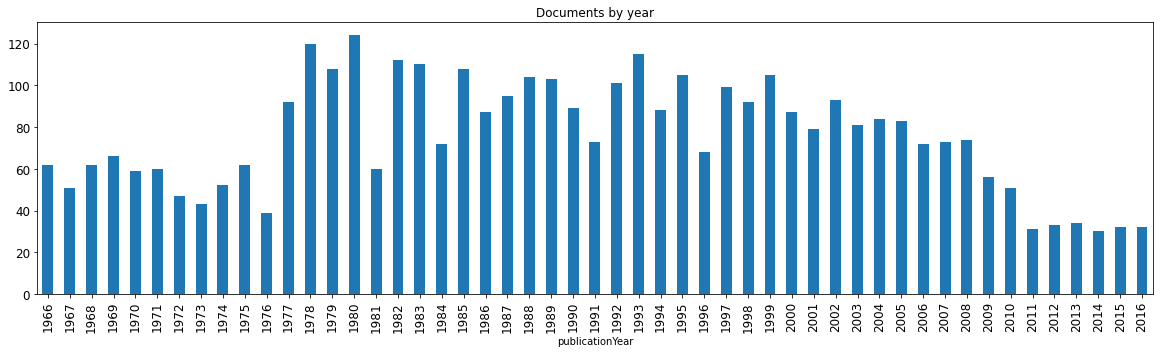

In [17]:
# Group the data by publication year and the aggregated number of ids into a bar chart
df.groupby(['publicationYear'])['id'].agg('count').plot.bar(title='Documents by year', figsize=(20, 5), fontsize=12); 

# Read more about Pandas dataframe plotting here: 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

And now let's look at the total page numbers by year.

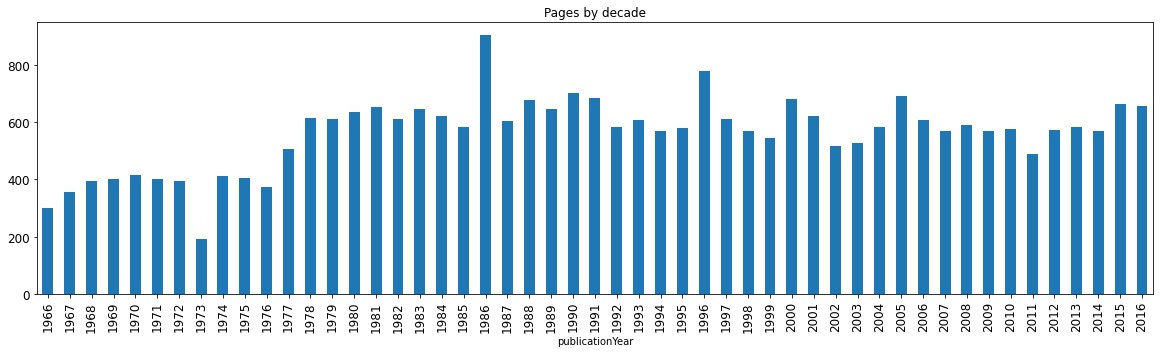

In [18]:
# Group the data by publication year and aggregated sum of the page counts into a bar chart

df.groupby(['publicationYear'])['pageCount'].agg('sum').plot.bar(title='Pages by decade', figsize=(20, 5), fontsize=12);